In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale


import math

from IPython.display import display
import statsmodels.formula.api as smf

# Display preferences.
pd.options.display.float_format = '{:.3f}'.format



In [27]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header=4, skip_footer=3)
df.columns = [c.replace('\n', ' ') for c in df.columns]
df.to_csv('cleaned_crime.csv')
df = pd.read_csv('cleaned_crime.csv', index_col=0)
df.fillna(0)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,0.000,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,0.000,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,0.000,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,0.000,30,227,526,4090,705,3243,142,0.000
4,Albion Village,6388,23,0,0.000,3,4,16,223,53,165,5,0.000
5,Alfred Village,4089,5,0,0.000,0,3,2,46,10,36,0,0.000
6,Allegany Village,1781,3,0,0.000,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,0.000,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0,0.000,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0,0.000,0,12,18,405,99,291,15,0.000


In [50]:
for column in df:
    print(column)

City
Population
Violent crime
Murder and nonnegligent manslaughter
Rape (revised definition)1
Rape (legacy definition)2
Robbery
Aggravated assault
Property crime
Burglary
Larceny- theft
Motor vehicle theft
Arson3


In [64]:
df_Norm = pd.DataFrame()
for column in df:
    if column == 'City':
        df_Norm[column] = df[column]
    elif column != 'Population':
        df_Norm[str.replace(column,' ','_') + '_norm'] = pd.to_numeric(df[column],errors='coerce')/df['Population']

df_Norm_outlier_removed = df_Norm[['Violent_crime_norm', 'Burglary_norm', 'Larceny-_theft_norm','Property_crime_norm']].query('Property_crime_norm < .10')

#df_Norm
df_Norm_outlier_removed.head()

,Violent_crime_norm,Burglary_norm,Larceny-_theft_norm,Property_crime_norm
0,0.000,0.001,0.005,0.006
1,0.001,0.001,0.008,0.009
2,0.001,0.000,0.005,0.006
3,0.008,0.007,0.033,0.042
4,0.004,0.008,0.026,0.035


In [35]:
correlation_matrix = df_Norm.corr()
display(correlation_matrix)

,City_norm,Violent crime_norm,Murder and nonnegligent manslaughter_norm,Rape (revised definition)1_norm,Rape (legacy definition)2_norm,Robbery_norm,Aggravated assault_norm,Property crime_norm,Burglary_norm,Larceny- theft_norm,Motor vehicle theft_norm,Arson3_norm
City_norm,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Violent crime_norm,nan,1.000,0.598,nan,0.593,0.863,0.964,0.532,0.699,0.441,0.589,0.518
Murder and nonnegligent manslaughter_norm,nan,0.598,1.000,nan,0.292,0.640,0.505,0.209,0.331,0.150,0.419,0.433
Rape (revised definition)1_norm,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Rape (legacy definition)2_norm,nan,0.593,0.292,nan,1.000,0.404,0.539,0.449,0.485,0.409,0.265,0.387
Robbery_norm,nan,0.863,0.640,nan,0.404,1.000,0.710,0.420,0.575,0.334,0.631,0.477
Aggravated assault_norm,nan,0.964,0.505,nan,0.539,0.710,1.000,0.518,0.682,0.431,0.514,0.471
Property crime_norm,nan,0.532,0.209,nan,0.449,0.420,0.518,1.000,0.787,0.986,0.509,0.433
Burglary_norm,nan,0.699,0.331,nan,0.485,0.575,0.682,0.787,1.000,0.676,0.553,0.468
Larceny- theft_norm,nan,0.441,0.150,nan,0.409,0.334,0.431,0.986,0.676,1.000,0.428,0.384


In [40]:
#independent and dependent variables
Y = df_Norm['Property crime_norm']
X = df_Norm[['Violent crime_norm', 'Burglary_norm', 'Larceny- theft_norm']].copy()
X.head()



,Violent crime_norm,Burglary_norm,Larceny- theft_norm
0,0.000,0.001,0.005
1,0.001,0.001,0.008
2,0.001,0.000,0.005
3,0.008,0.007,0.033
4,0.004,0.008,0.026


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

lg = LinearRegression()
lg.fit(scale(X), scale(Y))

# Inspect the results.
print('\nCoefficients: \n', lg.coef_)
print('\nIntercept: \n', lg.intercept_)
print('\nR-squared:')
print(lg.score(scale(X), scale(Y)))



Coefficients: 
 [0.01636636 0.20973479 0.83689137]

Intercept: 
 -7.608064831879677e-17

R-squared:
0.9989995354117505


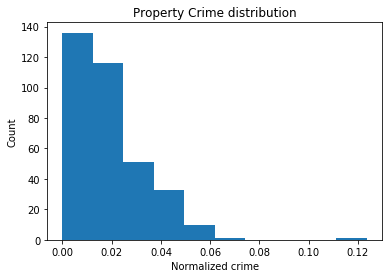

In [57]:
# Plot property crime
plt.hist(df_Norm['Property crime_norm'])
plt.title('Property Crime distribution')
plt.xlabel('Normalized crime')
plt.ylabel('Count')
plt.show()


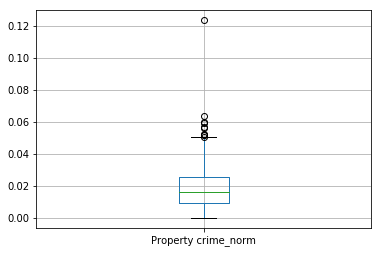

In [59]:

df_Norm.boxplot(column='Property crime_norm')

In [21]:
correlation_matrix = df.corr()
display(correlation_matrix)

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Prop_crime_norm
Population,1.000,0.999,0.987,nan,0.991,0.998,0.999,0.996,0.971,0.998,0.992,0.702,0.002
Violent crime,0.999,1.000,0.992,nan,0.995,1.000,1.000,0.998,0.978,0.999,0.996,0.918,0.011
Murder and nonnegligent manslaughter,0.987,0.992,1.000,nan,0.998,0.993,0.991,0.995,0.994,0.993,0.998,0.963,0.033
Rape (revised definition)1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Rape (legacy definition)2,0.991,0.995,0.998,nan,1.000,0.995,0.994,0.998,0.992,0.996,0.999,0.926,0.042
Robbery,0.998,1.000,0.993,nan,0.995,1.000,1.000,0.998,0.980,0.999,0.997,0.932,0.011
Aggravated assault,0.999,1.000,0.991,nan,0.994,1.000,1.000,0.998,0.976,0.999,0.995,0.888,0.010
Property crime,0.996,0.998,0.995,nan,0.998,0.998,0.998,1.000,0.987,1.000,0.998,0.921,0.037
Burglary,0.971,0.978,0.994,nan,0.992,0.980,0.976,0.987,1.000,0.983,0.991,0.952,0.075
Larceny- theft,0.998,0.999,0.993,nan,0.996,0.999,0.999,1.000,0.983,1.000,0.997,0.894,0.031


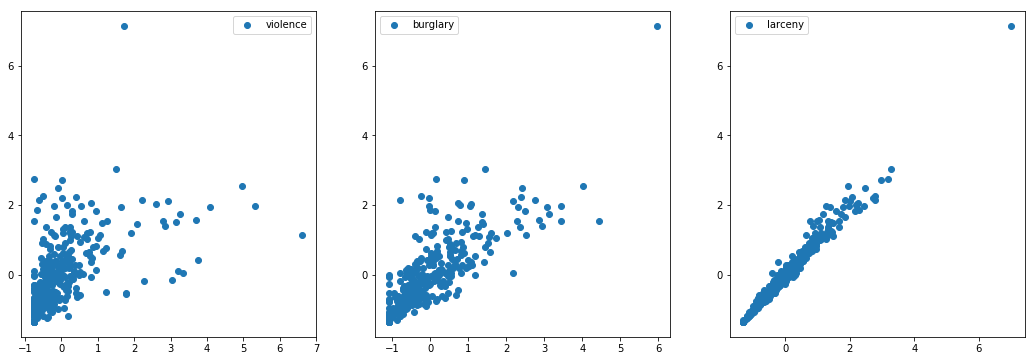

In [37]:

fig  = plt.figure(figsize=(18,6))

plt.subplot(131)
plt.scatter(scale(df_Norm['Violent crime_norm']), scale(df_Norm['Property crime_norm']), label='violence')
plt.legend()

plt.subplot(132)
plt.scatter(scale(df_Norm['Burglary_norm']), scale(df_Norm['Property crime_norm']), label='burglary')
plt.legend()

plt.subplot(133)
plt.scatter(scale(df_Norm['Larceny- theft_norm']), scale(df_Norm['Property crime_norm']), label='larceny')
plt.legend()






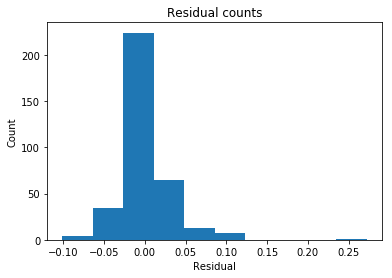

In [44]:
# Extract predicted values.
predicted = lg.predict(scale(X)).ravel()
actual = scale(df_Norm['Property crime_norm'])

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

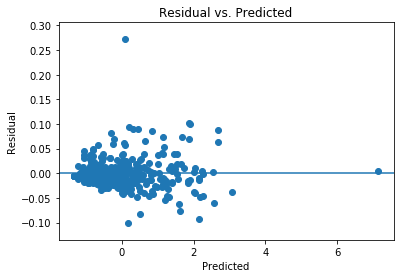

In [45]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

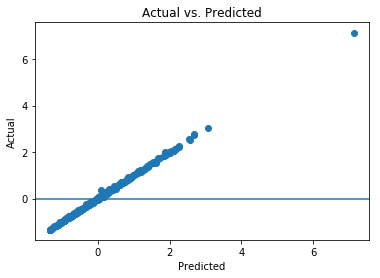

In [46]:
plt.scatter(predicted, actual)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.axhline(y=0)
plt.title('Actual vs. Predicted')
plt.show()


In [65]:
df_Norm_outlier_removed

#independent and dependent variables
Y = df_Norm_outlier_removed['Property_crime_norm']
X = df_Norm_outlier_removed[['Violent_crime_norm', 'Burglary_norm', 'Larceny-_theft_norm']].copy()
X.head()

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

lg = LinearRegression()
lg.fit(scale(X), scale(Y))

# Inspect the results.
print('\nCoefficients: \n', lg.coef_)
print('\nIntercept: \n', lg.intercept_)
print('\nR-squared:')
print(lg.score(scale(X), scale(Y)))



Coefficients: 
 [0.01772828 0.21508887 0.83958028]

Intercept: 
 5.117883360030524e-17

R-squared:
0.9988271218088274


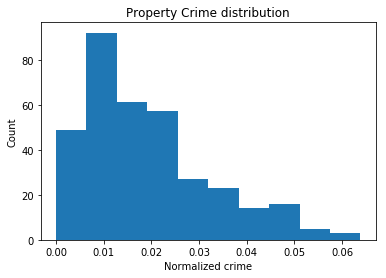

In [67]:
# Plot property crime
plt.hist(df_Norm_outlier_removed['Property_crime_norm'])
plt.title('Property Crime distribution')
plt.xlabel('Normalized crime')
plt.ylabel('Count')
plt.show()

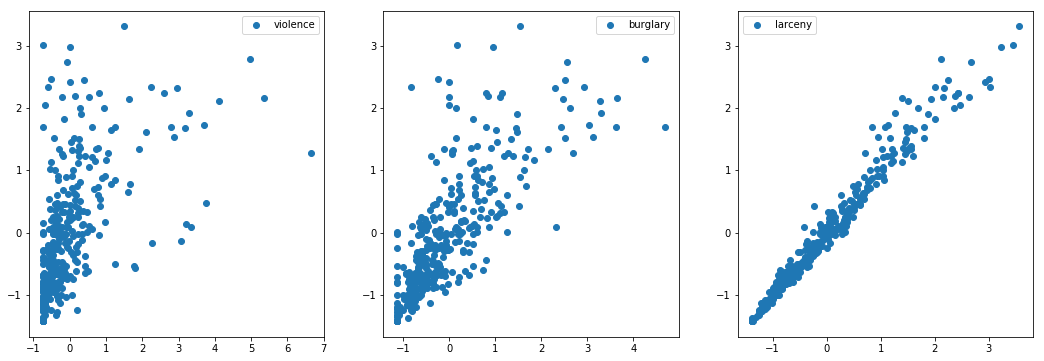

In [68]:

fig  = plt.figure(figsize=(18,6))

plt.subplot(131)
plt.scatter(scale(df_Norm_outlier_removed['Violent_crime_norm']), scale(df_Norm_outlier_removed['Property_crime_norm']), label='violence')
plt.legend()

plt.subplot(132)
plt.scatter(scale(df_Norm_outlier_removed['Burglary_norm']), scale(df_Norm_outlier_removed['Property_crime_norm']), label='burglary')
plt.legend()

plt.subplot(133)
plt.scatter(scale(df_Norm_outlier_removed['Larceny-_theft_norm']), scale(df_Norm_outlier_removed['Property_crime_norm']), label='larceny')
plt.legend()



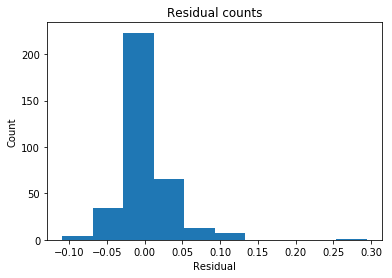

In [70]:
# Extract predicted values.
predicted = lg.predict(scale(X)).ravel()
actual = scale(df_Norm_outlier_removed['Property_crime_norm'])

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

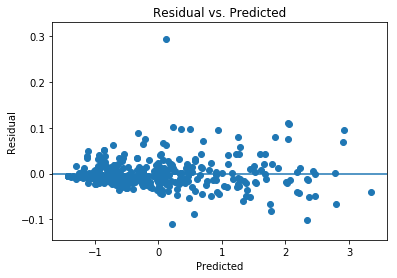

In [71]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

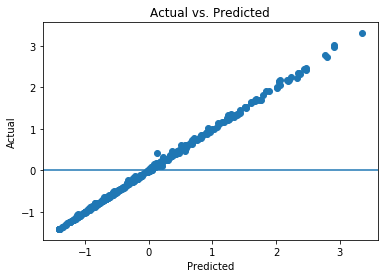

In [72]:
plt.scatter(predicted, actual)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.axhline(y=0)
plt.title('Actual vs. Predicted')
plt.show()
